In [1]:
# package load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import collections
%matplotlib inline

# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [6]:
data = pd.read_csv('설문조사_최종데이터_전처리전.csv', encoding = 'cp949').fillna('x')

# 전처리

In [7]:
def age20(data):
    if data <30:
        나머지 = data%20
        if 나머지 in [0,1,2]:
            return '20초'
        elif 나머지 in [3,4,5,6]:
            return '20중'
        elif 나머지 in [7,8,9]:
            return '20후'
    else:
        return str(data//10*10)

In [8]:
# 데이터 정리
new_data = pd.DataFrame()

#20대 세분화
#new_data['연령대'] = data['귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)'].apply(age20)
#20대 통째로
new_data['연령대'] = data['귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)'].apply(lambda x: x//10*10)

new_data['성별'] = data['귀하의 성별은 무엇인가요?']
new_data['직업'] = data['귀하는 어떤 일을 하십니까?']
new_data['거주형태'] = data['귀하가 함께 거주하는 사람은 누구인가요?']
new_data['취미'] = data['귀하의 취미는 무엇인가요?']
new_data['건강고려'] = data['평소 음식/음료를 섭취할 때 건강을 고려하는 편인가요?']
new_data['신제품선호도'] = data['신제품이나 트렌디한 음료를 대체로 경험해보시나요? (ex 버블티, 아샷추, 달고나 커피 등)']
new_data['업무량'] = data['평소 본인의 업무량(학업량)이 많다고 생각하십니까?']
new_data['커피빈도'] = data['커피를 일주일에 몇 회 마시나요?']
new_data['차빈도'] = data['차를 일주일에 몇 회 마시나요?']
new_data['탄산음료빈도'] = data['탄산음료를 일주일에 몇 회 마시나요?']
new_data['에너지음료빈도'] = data['에너지음료를 일주일에 몇 회 마시나요?']
new_data['이온/스포츠음료빈도'] = data['이온/스포츠음료를 일주일에 몇 회 마시나요?']
new_data['탄산수빈도'] = data['탄산수를 일주일에 몇 회 마시나요?']
new_data['과채음료빈도'] = data['과채음료를 일주일에 몇 회 마시나요?']

In [9]:
#20대 세분화
#OH_data = pd.DataFrame(pd.get_dummies(new_data.연령대))

#20대 통째로
OH_data = pd.DataFrame(new_data.연령대)

OH_data['성별'] = new_data.성별.replace('남', 0).replace('여', 1)
직업 = pd.get_dummies(new_data.직업)
OH_data = pd.concat([OH_data, 직업], axis = 1)
취미 = pd.get_dummies(new_data.취미)
OH_data = pd.concat([OH_data, 취미], axis = 1)

In [10]:
count_dic = {'거의 마시지 않음': 0, '1~2회' : 1, '3~5회' : 2, '6~8회':3, '9~11회':4, '12회 이상':5}
ok_dic = {'매우 그렇지 않다.':0, '그렇지 않다.':1, '보통이다.':2, '그렇다.':3, '매우 그렇다.':4}
new_dic = {'관심 없다.':0, '관심만 가진다.':1, '대체로 경험해보는 편이다.':2, '항상 경험해본다.':3}

In [11]:
OH_data['건강고려'] = new_data.건강고려.apply(lambda x: ok_dic[x])
OH_data['신제품선호도'] = new_data.신제품선호도.apply(lambda x: new_dic[x])
OH_data['업무량'] = new_data.업무량.apply(lambda x: ok_dic[x])
OH_data['커피빈도'] = new_data.커피빈도.apply(lambda x: count_dic[x])
OH_data['차빈도'] = new_data.차빈도.apply(lambda x: count_dic[x])
OH_data['탄산음료빈도'] = new_data.탄산음료빈도.apply(lambda x: count_dic[x])
OH_data['에너지음료빈도'] = new_data.에너지음료빈도.apply(lambda x: count_dic[x])
OH_data['이온/스포츠음료빈도'] = new_data['이온/스포츠음료빈도'].apply(lambda x: count_dic[x])
OH_data['탄산수빈도'] = new_data.탄산수빈도.apply(lambda x: count_dic[x])

In [12]:
ll = data['다음 중 귀하가 선호하는 음료는 무엇인가요? (최대 2개 선택)'].apply(lambda x: x.split(', '))
unique_col = pd.Series([j for i in ll for j in i]).unique()
ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
for i in range(len(ll)):
    for s in ll[i]:
        ddd.loc[i, s] += 1
OH_data = pd.concat([OH_data, ddd], axis = 1)

In [13]:
def sp(x):
    try:
        return x.split(', ')
    except:
        return x

def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 주로 언제 마시나요? (최대 2개 선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1
    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [14]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 마실 때 기대하는 요인은 무엇인가요? (복수선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [15]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 마실 때 우려하는 요인은 무엇인가요? (복수 선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [16]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}와 주로 함께 먹는 음식은 무엇인가요?'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [17]:
OH_data.drop('기타', axis = 1, inplace = True)

In [18]:
OH_data

,연령대,성별,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생,...,과채음료_식사류,과채음료_샐러드/다이어트식,과채음료_음료만 섭취,과채음료_디저트,탄산수_디저트,탄산수_식사류,탄산수_샐러드/다이어트식,탄산수_음료만 섭취,에너지음료_음료만 섭취,에너지음료_식사류
0,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,1,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
368,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
OH_data.to_csv('설문최종정리_혜지ver.csv', index = False)

# 임베딩

In [19]:
# 20대 세분화시 연령대 제거
not_OHE = ['연령대','성별', '건강고려', '신제품선호도', '업무량', '커피빈도', '차빈도', '탄산음료빈도', '에너지음료빈도', '이온/스포츠음료빈도', '탄산수빈도']
OHE = OH_data.columns.difference(not_OHE)
emb_data = OH_data.copy()
emb_data_not_OHE = OH_data[not_OHE]
emb_data_OHE = OH_data[OHE]

In [20]:
for i in range(len(not_OHE)):
    col = not_OHE[i]
    emb_data_not_OHE[col] = emb_data_not_OHE[col].apply(lambda x: col + '_' +str(x))
emb_data_not_OHE['성별'] = emb_data_not_OHE['성별'].replace('성별_0', '남').replace('성별_1', '여')

#20대 세분화시 바로 아래 주석처리
emb_data_not_OHE['연령대'] = emb_data_not_OHE['연령대'].apply(lambda x: x.split('_')[1])

emb_data[not_OHE] = emb_data_not_OHE.values

C:\Users\onest\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\onest\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\onest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [21]:
for i in range(len(OHE)):
    col = OHE[i]
    if '_' in col:
        ss = np.array([col.split('_') if i == 1 else None for i in OH_data[col]])
    else:
        ss = np.array([col if i == 1 else None for i in OH_data[col]])
    emb_data_OHE[col] = ss
emb_data[OHE] = emb_data_OHE.values

C:\Users\onest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
import random
emb = []
embb = []
for i in emb_data.values:
    i_copy = list(i)
    emb2 = []
    i_copy += [emb_data.values[0][0] for i_copy in range(5)] + [emb_data.values[0][1] for i_copy in range(5)]
    random.shuffle(i_copy)
    for j in i_copy:
        if type(j) == list:
            for s in j:
                emb2.append(s)
        elif j != None:
            emb2.append(j)
    emb.append(emb2 + emb2 + emb2)
    embb.append(emb2)

In [23]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = emb, size=10, window = 10, min_count=0, workers=4)

In [24]:
model.wv.most_similar("에너지음료")

[('에너지음료빈도_1', 0.9957555532455444),
 ('이온/스포츠음료', 0.9847333431243896),
 ('운동 전후', 0.963773250579834),
 ('피로회복', 0.9354845285415649),
 ('이온/스포츠음료빈도_1', 0.9256079196929932),
 ('이온/스포츠음료빈도_2', 0.8799894452095032),
 ('이온/스포츠음료빈도_5', 0.8183044791221619),
 ('에너지음료빈도_2', 0.7962556481361389),
 ('각성효과', 0.792462944984436),
 ('합성 첨가물', 0.7782146334648132)]

In [54]:
final_emb = []
for i in range(len(embb)):
    final_emb.append(list(model.wv[list(set(embb[i]))]))

In [55]:
new_mean = []
for i in range(len(final_emb)):
    zz = np.array(final_emb[i]).reshape(len(final_emb[i]), 10).mean(axis = 0)
    new_mean.append(zz)

In [56]:
len(new_mean) #372여야함

372

In [57]:
final_emb = np.array(new_mean).reshape(372, 10)

In [58]:
final_emb

array([[ 6.1653994e-02, -1.0000138e+00, -5.2187175e-02, ...,
         2.1172966e-01,  6.6835809e-01,  5.2919447e-01],
       [ 3.1205469e-01, -8.7310362e-01,  3.5102606e-02, ...,
         4.4406515e-01,  6.1025351e-01,  3.9459631e-01],
       [ 1.8267895e-01, -9.5771021e-01, -7.2867349e-02, ...,
         7.1785897e-02,  5.8875412e-01,  6.0983390e-01],
       ...,
       [ 2.5270799e-01, -9.6847689e-01,  1.4309296e-02, ...,
         2.5493816e-01,  6.4315182e-01,  4.3066522e-01],
       [ 2.9585224e-01, -9.3812156e-01, -1.5562449e-02, ...,
         3.6629367e-01,  5.8288753e-01,  4.5618454e-01],
       [ 2.2513744e-01, -9.7934824e-01, -1.7894499e-02, ...,
        -7.7542273e-04,  6.2623638e-01,  5.9414941e-01]], dtype=float32)

# Kmeans

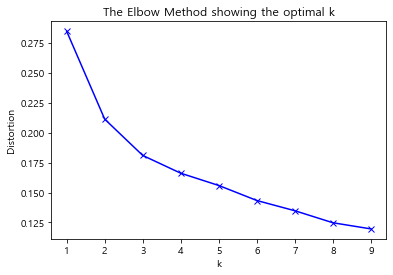

In [59]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(final_emb)
    kmeanModel.fit(final_emb)
    distortions.append(sum(np.min(cdist(final_emb, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_emb.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(final_emb)

KMeans(n_clusters=5)

In [61]:
fix = np.array([3, 1, 4, 1, 3, 1, 4, 3, 1, 3, 1, 1, 3, 2, 1, 0, 3, 4, 2, 1, 0, 0,
       3, 0, 2, 0, 0, 0, 1, 3, 1, 1, 1, 0, 1, 2, 3, 3, 3, 2, 1, 3, 2, 0,
       1, 0, 4, 1, 3, 0, 1, 0, 1, 1, 4, 1, 3, 3, 4, 3, 0, 0, 1, 2, 2, 1,
       3, 3, 3, 3, 3, 3, 1, 0, 1, 4, 0, 1, 3, 1, 0, 1, 3, 2, 1, 1, 3, 1,
       3, 3, 1, 0, 1, 2, 2, 3, 1, 1, 1, 4, 1, 3, 1, 3, 0, 0, 3, 3, 0, 3,
       2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2,
       2, 0, 0, 3, 2, 3, 4, 2, 4, 3, 4, 4, 1, 4, 4, 0, 4, 1, 3, 2, 1, 0,
       2, 0, 0, 2, 2, 0, 4, 1, 1, 4, 0, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 3,
       2, 1, 2, 1, 3, 1, 0, 2, 2, 3, 1, 1, 4, 4, 1, 0, 4, 3, 0, 1, 3, 3,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 3, 1, 2, 4, 1, 3, 0, 4, 1, 3, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 3, 1, 4,
       3, 2, 3, 0, 0, 2, 1, 3, 2, 4, 1, 4, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0,
       3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 2, 4, 2, 1, 4, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 3, 4, 4, 3, 4, 1, 0, 1, 1, 1, 4, 0, 2, 1, 2, 1, 4, 0,
       0, 0, 4, 1, 4, 2, 1, 1, 1, 3, 0, 3, 3, 1, 4, 1, 2, 2, 1, 1, 0, 1,
       4, 1, 1, 3, 1, 1, 3, 3, 1, 3, 4, 1, 3, 3, 2, 1, 1, 4, 3, 2, 1, 1,
       3, 2, 1, 3, 2, 3, 4, 1, 4, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 4])

In [62]:
#new_data['category'] = km.labels_
new_data['category'] = fix

# 분석

In [63]:
new_data.category.value_counts()

1    132
3     77
2     64
0     57
4     42
Name: category, dtype: int64

In [64]:
new_data.columns

Index(['연령대', '성별', '직업', '거주형태', '취미', '건강고려', '신제품선호도', '업무량', '커피빈도', '차빈도',
       '탄산음료빈도', '에너지음료빈도', '이온/스포츠음료빈도', '탄산수빈도', '과채음료빈도', 'category'],
      dtype='object')

In [65]:
def ratio(x):
    return x/sum(x)
def stack_ratio(new_data, i, v, seq):
    df = pd.pivot_table(data = new_data, index = i, columns = 'category', values = v, aggfunc='count').fillna(0).agg(ratio).T
    df = df[seq]
    ax = df.plot(kind='bar', stacked=True, title= f"그룹 별 {i} 비율(%)", rot=0)
    
    for p in ax. patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    plt.sca(ax)
    plt.legend( ncol=1, loc='center right',bbox_to_anchor=(1.4,0.5), scatterpoints=1 )
    plt.box(False)

In [66]:
# 평균나이
new_data['나이'] = data['귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)']
new_data.groupby('category').나이.mean()

category
0    29.947368
1    28.750000
2    34.015625
3    24.454545
4    35.047619
Name: 나이, dtype: float64

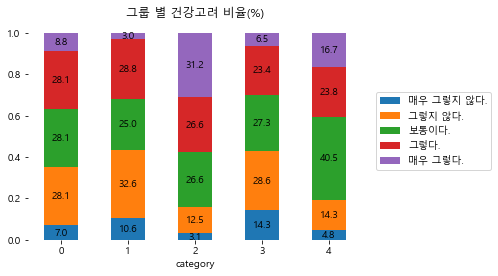

In [67]:
stack_ratio(new_data, '건강고려', '성별', ['매우 그렇지 않다.', '그렇지 않다.', '보통이다.', '그렇다.', '매우 그렇다.'])

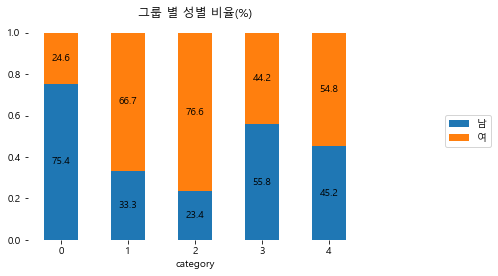

In [68]:
stack_ratio(new_data, '성별', '연령대', ['남', '여'])

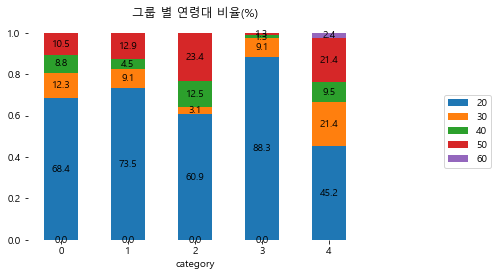

In [71]:
# 20대 세분화
#stack_ratio(new_data, '연령대', '직업', ['20초', '20중', '20후', '30', '40', '50', '60'])
# 20대 통째로
stack_ratio(new_data, '연령대', '직업', [20,30,40,50,60])

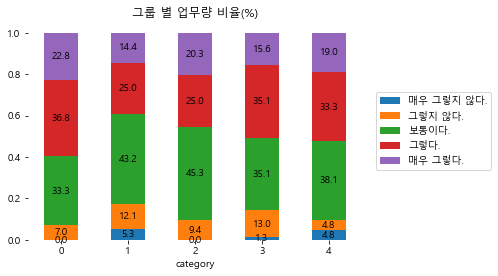

In [72]:
stack_ratio(new_data, '업무량', '성별', ['매우 그렇지 않다.', '그렇지 않다.', '보통이다.', '그렇다.', '매우 그렇다.'])

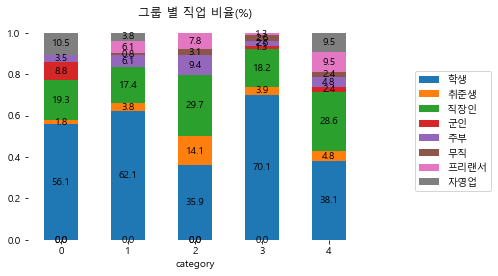

In [73]:
stack_ratio(new_data, '직업', '성별', ['학생', '취준생', '직장인', '군인', '주부', '무직', '프리랜서', '자영업'])

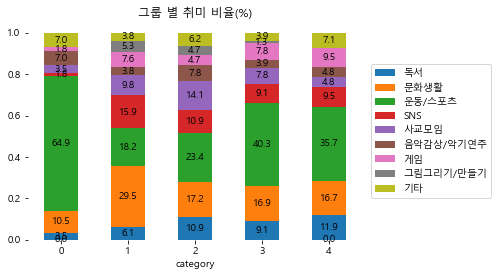

In [74]:
stack_ratio(new_data, '취미', '성별', ['독서', '문화생활', '운동/스포츠', 'SNS', '사교모임', '음악감상/악기연주', '게임',
       '그림그리기/만들기', '기타'])

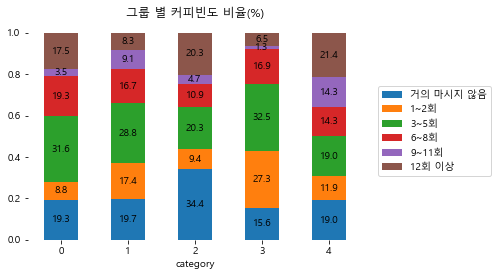

In [75]:
stack_ratio(new_data, '커피빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

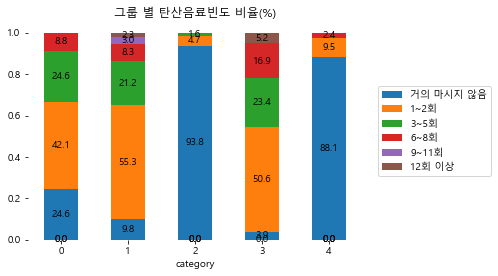

In [76]:
stack_ratio(new_data, '탄산음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

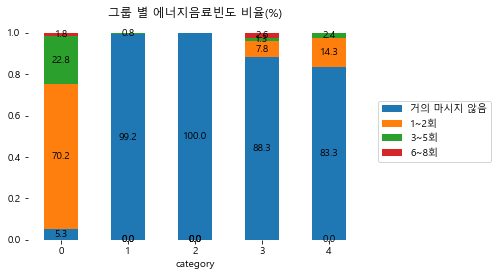

In [77]:
stack_ratio(new_data, '에너지음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

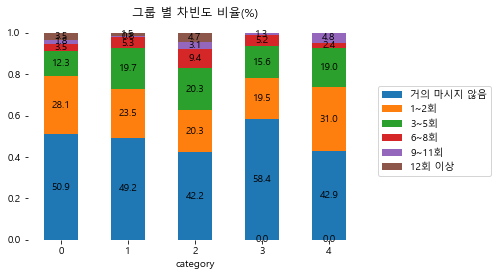

In [78]:
stack_ratio(new_data, '차빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

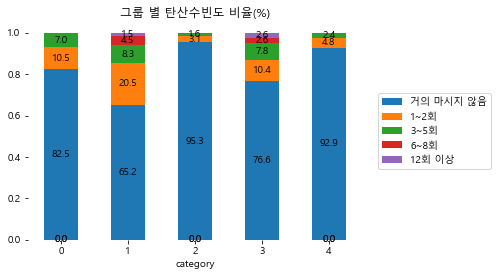

In [79]:
stack_ratio(new_data, '탄산수빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회','12회 이상'])

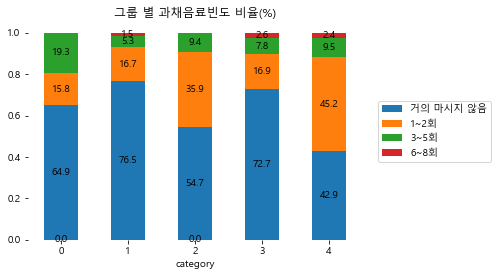

In [80]:
stack_ratio(new_data, '과채음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

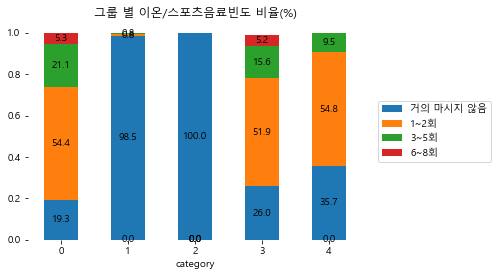

In [81]:
stack_ratio(new_data, '이온/스포츠음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

### 선호음료 비율

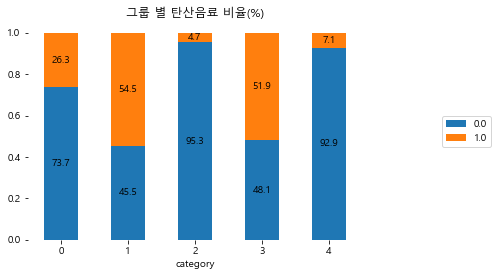

In [82]:
new_data[['탄산음료', '에너지음료', '커피', '과채음료', '탄산수', '이온/스포츠음료']]= OH_data[['탄산음료', '에너지음료', '커피', '과채음료', '탄산수', '이온/스포츠음료']]
stack_ratio(new_data, '탄산음료', '성별', [0, 1])

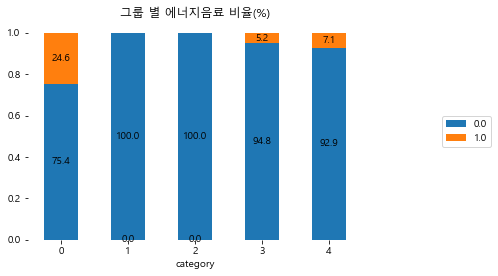

In [83]:
stack_ratio(new_data, '에너지음료', '성별', [0, 1])

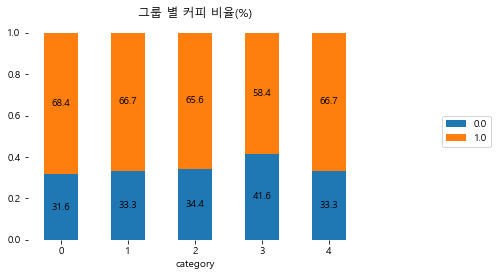

In [84]:
stack_ratio(new_data, '커피', '성별', [0, 1])

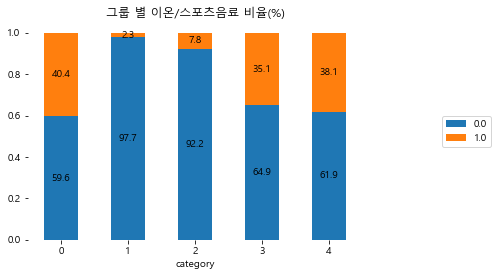

In [85]:
stack_ratio(new_data, '이온/스포츠음료', '성별', [0, 1])

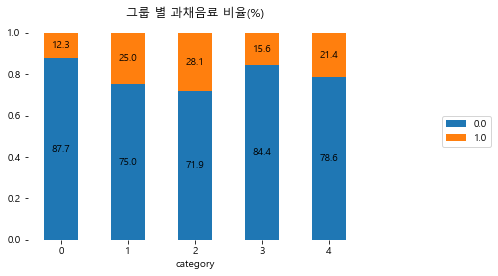

In [86]:
stack_ratio(new_data, '과채음료', '성별', [0, 1])

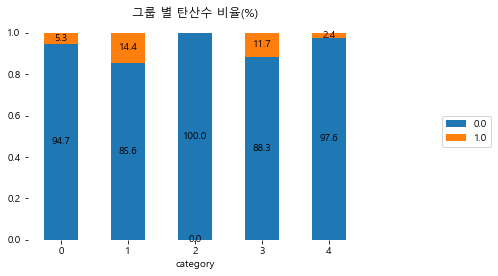

In [87]:
stack_ratio(new_data, '탄산수', '성별', [0, 1])

# 음용상황 비율

In [88]:
new_data[['커피_업무/공부 할 때',
 '커피_공복 시',
 '커피_공복 시 ',
 '커피_식사 시',
 '커피_친목 활동',
 '커피_운동 전후',
 '탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',
 '탄산음료_업무/공부 할 때',
 '이온/스포츠음료_취침 전',
 '이온/스포츠음료_운동 전후',
 '이온/스포츠음료_친목 활동',
 '이온/스포츠음료_공복 시',
 '이온/스포츠음료_업무/공부 할 때',
 '이온/스포츠음료_식사 시',
 '과채음료_업무/공부 할 때',
 '과채음료_취침 전',
 '과채음료_운동 전후',
 '과채음료_식사 시',
 '과채음료_공복 시',
 '과채음료_친목 활동',
 '탄산수_식사 시',
 '탄산수_공복 시',
 '탄산수_친목 활동',
 '탄산수_운동 전후',
 '탄산수_업무/공부 할 때',
 '탄산수_취침 전',
 '에너지음료_운동 전후',
 '에너지음료_취침 전',
 '에너지음료_식사 시',
 '에너지음료_친목 활동',
 '에너지음료_업무/공부 할 때',
 '에너지음료_공복 시',
 '에너지음료_업무/공부할 때',
 '커피_피로회복',
 '커피_갈증해소',
 '커피_소화촉진',
 '커피_건강',
 '커피_각성효과',
 '커피_다이어트',
 '커피_맛',
 '탄산음료_건강',
 '탄산음료_맛',
 '탄산음료_피로회복',
 '탄산음료_다이어트',
 '탄산음료_갈증해소',
 '탄산음료_각성효과',
 '탄산음료_소화촉진',
 '이온/스포츠음료_소화촉진',
 '이온/스포츠음료_다이어트',
 '이온/스포츠음료_각성효과',
 '이온/스포츠음료_건강',
 '이온/스포츠음료_맛',
 '이온/스포츠음료_갈증해소',
 '이온/스포츠음료_피로회복',
 '과채음료_피로회복',
 '과채음료_맛',
 '과채음료_갈증해소',
 '과채음료_다이어트',
 '과채음료_건강',
 '과채음료_소화촉진',
 '탄산수_건강',
 '탄산수_다이어트',
 '탄산수_각성효과',
 '탄산수_갈증해소',
 '탄산수_맛',
 '탄산수_소화촉진',
 '탄산수_피로회복',
 '에너지음료_피로회복',
 '에너지음료_맛',
 '에너지음료_다이어트',
 '에너지음료_건강',
 '에너지음료_각성효과',
 '에너지음료_갈증해소',
 '커피_합성 첨가물',
 '커피_당분',
 '커피_칼로리',
 '커피_치아 변색',
 '커피_치아 부식',
 '커피_없음',
 '커피_카페인',
 '탄산음료_당분',
 '탄산음료_칼로리',
 '탄산음료_합성 첨가물',
 '탄산음료_카페인',
 '탄산음료_없음',
 '탄산음료_치아 변색',
 '탄산음료_치아 부식',
 '이온/스포츠음료_치아 변색',
 '이온/스포츠음료_당분',
 '이온/스포츠음료_합성 첨가물',
 '이온/스포츠음료_칼로리',
 '이온/스포츠음료_치아 부식',
 '이온/스포츠음료_카페인',
 '이온/스포츠음료_없음',
 '과채음료_칼로리',
 '과채음료_합성 첨가물',
 '과채음료_당분',
 '과채음료_없음',
 '과채음료_카페인',
 '과채음료_치아 부식',
 '과채음료_치아 변색',
 '탄산수_합성 첨가물',
 '탄산수_칼로리',
 '탄산수_치아 부식',
 '탄산수_당분',
 '탄산수_없음',
 '탄산수_치아 변색',
 '탄산수_카페인',
 '에너지음료_카페인',
 '에너지음료_당분',
 '에너지음료_없음',
 '에너지음료_치아 변색',
 '에너지음료_합성 첨가물',
 '에너지음료_치아 부식',
 '에너지음료_칼로리',
 '커피_디저트',
 '커피_음료만 섭취',
 '커피_샐러드/다이어트식',
 '커피_식사류',
 '탄산음료_샐러드/다이어트식',
 '탄산음료_디저트',
 '탄산음료_음료만 섭취',
 '탄산음료_식사류',
 '이온/스포츠음료_식사류',
 '이온/스포츠음료_음료만 섭취',
 '이온/스포츠음료_샐러드/다이어트식',
 '과채음료_샐러드/다이어트식',
 '과채음료_식사류',
 '과채음료_음료만 섭취',
 '과채음료_디저트',
 '탄산수_디저트',
 '탄산수_샐러드/다이어트식',
 '탄산수_음료만 섭취',
 '탄산수_식사류',
 '에너지음료_식사류',
 '에너지음료_음료만 섭취']] = OH_data[['커피_업무/공부 할 때',
 '커피_공복 시',
 '커피_공복 시 ',
 '커피_식사 시',
 '커피_친목 활동',
 '커피_운동 전후',
 '탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',
 '탄산음료_업무/공부 할 때',
 '이온/스포츠음료_취침 전',
 '이온/스포츠음료_운동 전후',
 '이온/스포츠음료_친목 활동',
 '이온/스포츠음료_공복 시',
 '이온/스포츠음료_업무/공부 할 때',
 '이온/스포츠음료_식사 시',
 '과채음료_업무/공부 할 때',
 '과채음료_취침 전',
 '과채음료_운동 전후',
 '과채음료_식사 시',
 '과채음료_공복 시',
 '과채음료_친목 활동',
 '탄산수_식사 시',
 '탄산수_공복 시',
 '탄산수_친목 활동',
 '탄산수_운동 전후',
 '탄산수_업무/공부 할 때',
 '탄산수_취침 전',
 '에너지음료_운동 전후',
 '에너지음료_취침 전',
 '에너지음료_식사 시',
 '에너지음료_친목 활동',
 '에너지음료_업무/공부 할 때',
 '에너지음료_공복 시',
 '에너지음료_업무/공부할 때',
 '커피_피로회복',
 '커피_갈증해소',
 '커피_소화촉진',
 '커피_건강',
 '커피_각성효과',
 '커피_다이어트',
 '커피_맛',
 '탄산음료_건강',
 '탄산음료_맛',
 '탄산음료_피로회복',
 '탄산음료_다이어트',
 '탄산음료_갈증해소',
 '탄산음료_각성효과',
 '탄산음료_소화촉진',
 '이온/스포츠음료_소화촉진',
 '이온/스포츠음료_다이어트',
 '이온/스포츠음료_각성효과',
 '이온/스포츠음료_건강',
 '이온/스포츠음료_맛',
 '이온/스포츠음료_갈증해소',
 '이온/스포츠음료_피로회복',
 '과채음료_피로회복',
 '과채음료_맛',
 '과채음료_갈증해소',
 '과채음료_다이어트',
 '과채음료_건강',
 '과채음료_소화촉진',
 '탄산수_건강',
 '탄산수_다이어트',
 '탄산수_각성효과',
 '탄산수_갈증해소',
 '탄산수_맛',
 '탄산수_소화촉진',
 '탄산수_피로회복',
 '에너지음료_피로회복',
 '에너지음료_맛',
 '에너지음료_다이어트',
 '에너지음료_건강',
 '에너지음료_각성효과',
 '에너지음료_갈증해소',
 '커피_합성 첨가물',
 '커피_당분',
 '커피_칼로리',
 '커피_치아 변색',
 '커피_치아 부식',
 '커피_없음',
 '커피_카페인',
 '탄산음료_당분',
 '탄산음료_칼로리',
 '탄산음료_합성 첨가물',
 '탄산음료_카페인',
 '탄산음료_없음',
 '탄산음료_치아 변색',
 '탄산음료_치아 부식',
 '이온/스포츠음료_치아 변색',
 '이온/스포츠음료_당분',
 '이온/스포츠음료_합성 첨가물',
 '이온/스포츠음료_칼로리',
 '이온/스포츠음료_치아 부식',
 '이온/스포츠음료_카페인',
 '이온/스포츠음료_없음',
 '과채음료_칼로리',
 '과채음료_합성 첨가물',
 '과채음료_당분',
 '과채음료_없음',
 '과채음료_카페인',
 '과채음료_치아 부식',
 '과채음료_치아 변색',
 '탄산수_합성 첨가물',
 '탄산수_칼로리',
 '탄산수_치아 부식',
 '탄산수_당분',
 '탄산수_없음',
 '탄산수_치아 변색',
 '탄산수_카페인',
 '에너지음료_카페인',
 '에너지음료_당분',
 '에너지음료_없음',
 '에너지음료_치아 변색',
 '에너지음료_합성 첨가물',
 '에너지음료_치아 부식',
 '에너지음료_칼로리',
 '커피_디저트',
 '커피_음료만 섭취',
 '커피_샐러드/다이어트식',
 '커피_식사류',
 '탄산음료_샐러드/다이어트식',
 '탄산음료_디저트',
 '탄산음료_음료만 섭취',
 '탄산음료_식사류',
 '이온/스포츠음료_식사류',
 '이온/스포츠음료_음료만 섭취',
 '이온/스포츠음료_샐러드/다이어트식',
 '과채음료_샐러드/다이어트식',
 '과채음료_식사류',
 '과채음료_음료만 섭취',
 '과채음료_디저트',
 '탄산수_디저트',
 '탄산수_샐러드/다이어트식',
 '탄산수_음료만 섭취',
 '탄산수_식사류',
 '에너지음료_식사류',
 '에너지음료_음료만 섭취']]

In [89]:
음용상황 = [['커피_업무/공부 할 때',
 '커피_공복 시',
 '커피_공복 시 ',
 '커피_식사 시',
 '커피_친목 활동',
 '커피_운동 전후'],
 ['탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',
 '탄산음료_업무/공부 할 때'],
 ['이온/스포츠음료_취침 전',
 '이온/스포츠음료_운동 전후',
 '이온/스포츠음료_친목 활동',
 '이온/스포츠음료_공복 시',
 '이온/스포츠음료_업무/공부 할 때',
 '이온/스포츠음료_식사 시'],
 ['과채음료_업무/공부 할 때',
 '과채음료_취침 전',
 '과채음료_운동 전후',
 '과채음료_식사 시',
 '과채음료_공복 시',
 '과채음료_친목 활동'],
 ['탄산수_식사 시',
 '탄산수_공복 시',
 '탄산수_친목 활동',
 '탄산수_운동 전후',
 '탄산수_업무/공부 할 때',
 '탄산수_취침 전'],
 ['에너지음료_운동 전후',
 '에너지음료_취침 전',
 '에너지음료_식사 시',
 '에너지음료_친목 활동',
 '에너지음료_업무/공부 할 때',
 '에너지음료_공복 시',
 '에너지음료_업무/공부할 때']]

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


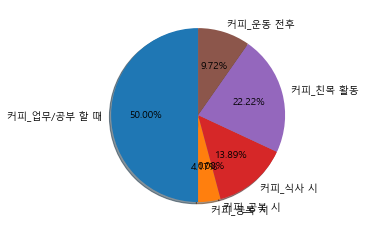

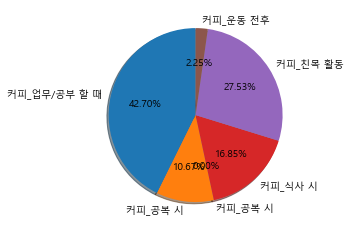

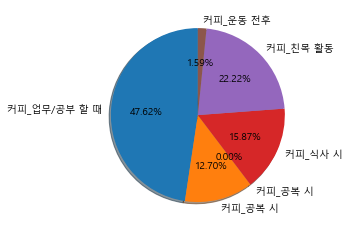

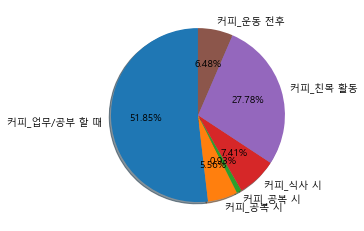

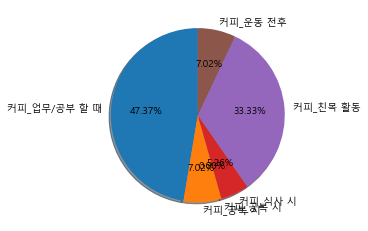

---------------------------------------------


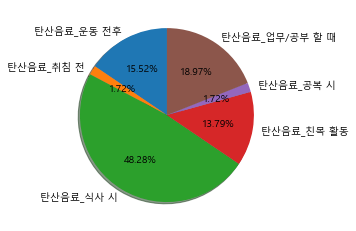

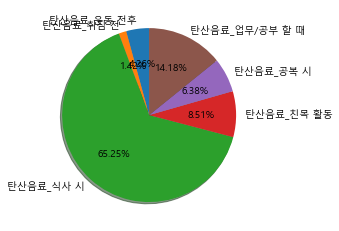

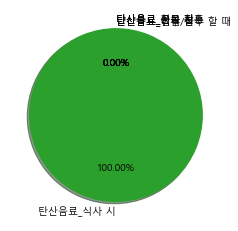

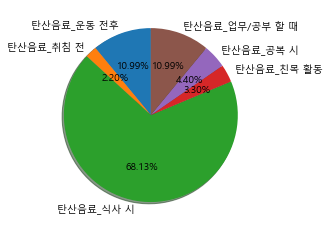

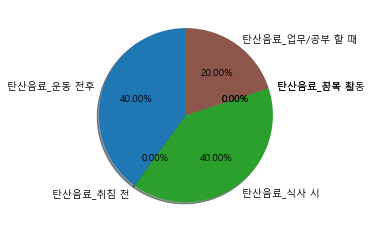

---------------------------------------------


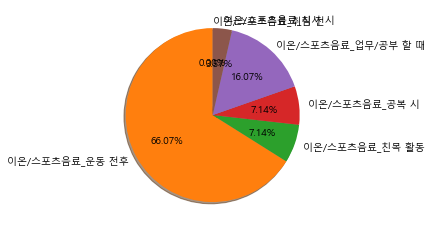

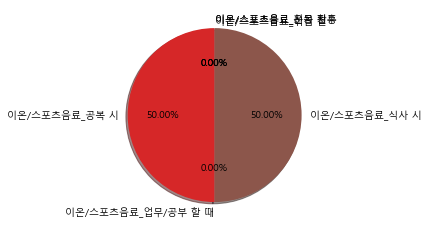

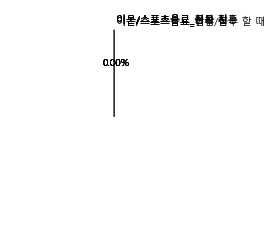

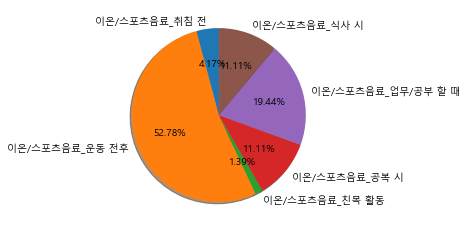

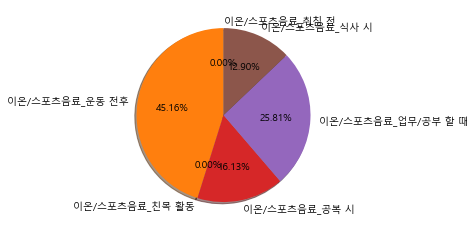

---------------------------------------------


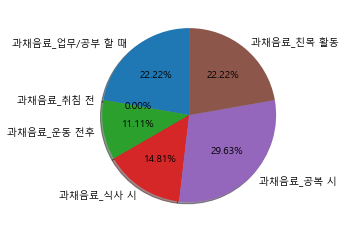

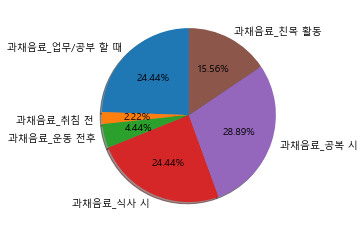

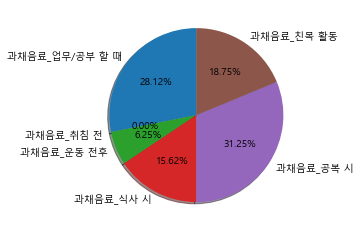

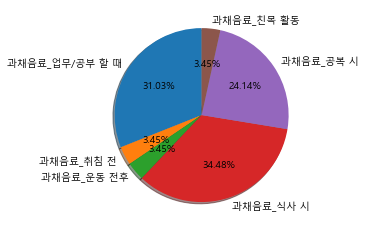

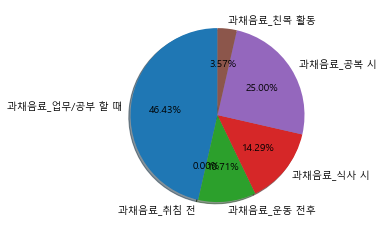

---------------------------------------------


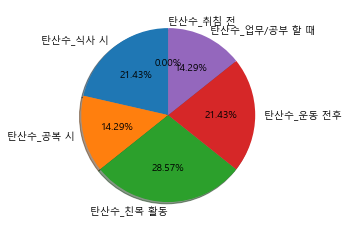

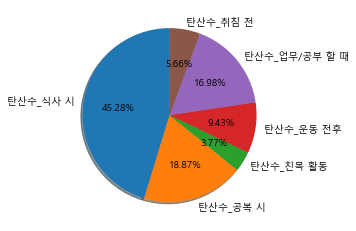

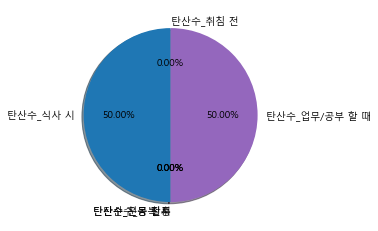

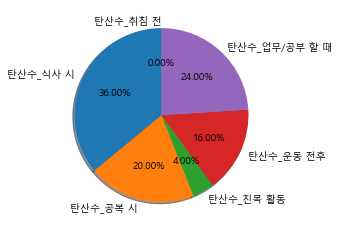

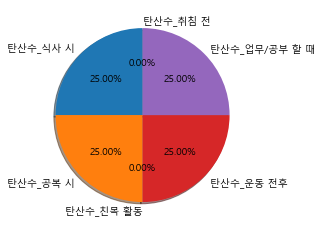

---------------------------------------------


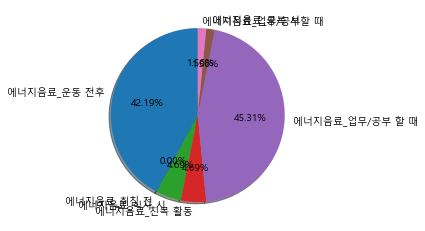

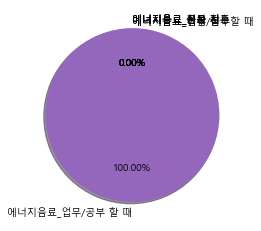

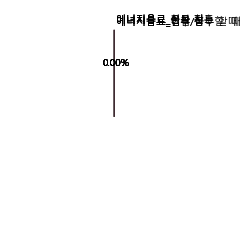

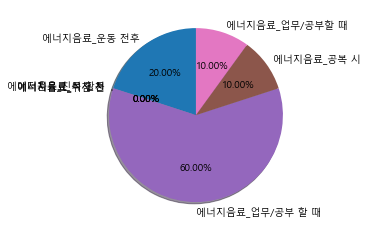

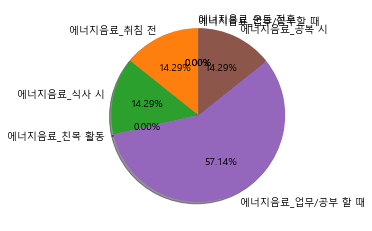

---------------------------------------------


In [91]:
for i in 음용상황:
    co = new_data[i]
    co['category'] = new_data.category
    sum_data = co.groupby('category')[i].sum()
    
    for i in range(5):
        aa = (sum_data.loc[i,:]/sum_data.sum(axis = 1)[i]*100).fillna(0)
        plt.pie(aa.values, labels=aa.index, shadow=True, startangle=90,autopct='%.2f%%')
        plt.title(f'{i} 군집')
        plt.show()
    print('---------------------------------------------')

# 기대요인

In [92]:
기대요인 = [['커피_피로회복',
 '커피_갈증해소',
 '커피_소화촉진',
 '커피_건강',
 '커피_각성효과',
 '커피_다이어트',
 '커피_맛'],
 ['탄산음료_건강',
 '탄산음료_맛',
 '탄산음료_피로회복',
 '탄산음료_다이어트',
 '탄산음료_갈증해소',
 '탄산음료_각성효과',
 '탄산음료_소화촉진'],
 ['이온/스포츠음료_소화촉진',
 '이온/스포츠음료_다이어트',
 '이온/스포츠음료_각성효과',
 '이온/스포츠음료_건강',
 '이온/스포츠음료_맛',
 '이온/스포츠음료_갈증해소',
 '이온/스포츠음료_피로회복'],
 ['과채음료_피로회복',
 '과채음료_맛',
 '과채음료_갈증해소',
 '과채음료_다이어트',
 '과채음료_건강',
 '과채음료_소화촉진'],
 ['탄산수_건강',
 '탄산수_다이어트',
 '탄산수_각성효과',
 '탄산수_갈증해소',
 '탄산수_맛',
 '탄산수_소화촉진',
 '탄산수_피로회복'],
 ['에너지음료_피로회복',
 '에너지음료_맛',
 '에너지음료_다이어트',
 '에너지음료_건강',
 '에너지음료_각성효과',
 '에너지음료_갈증해소']]

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


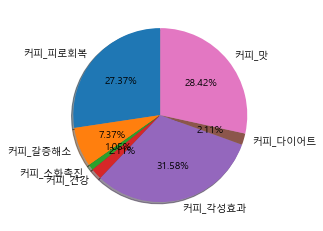

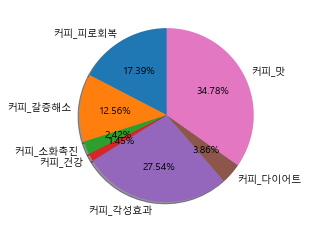

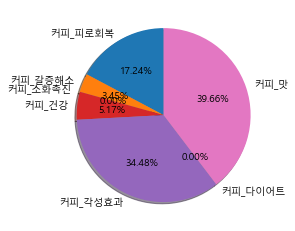

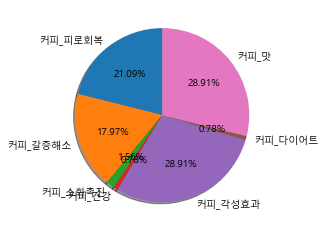

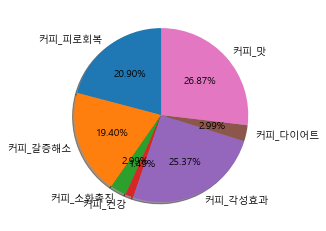

---------------------------------------------


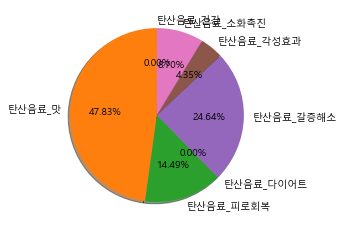

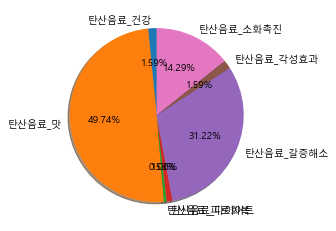

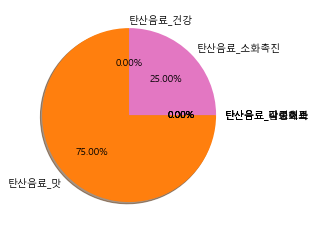

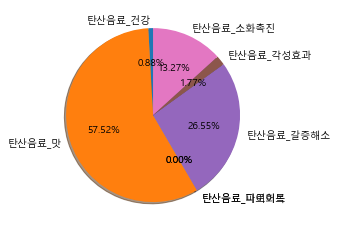

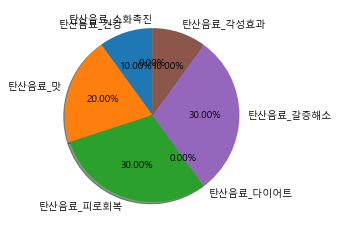

---------------------------------------------


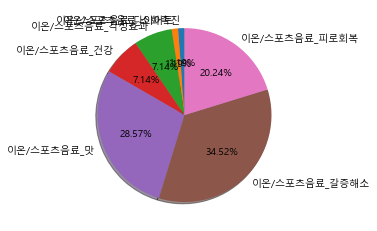

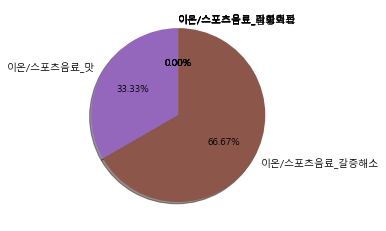

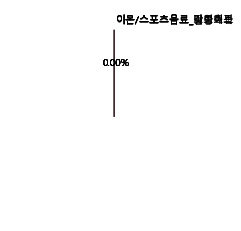

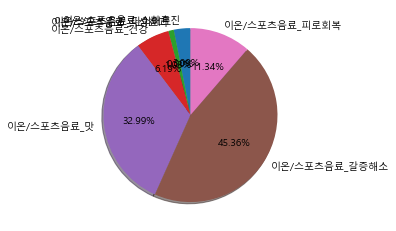

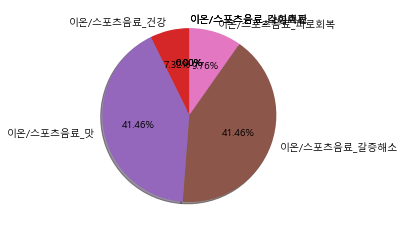

---------------------------------------------


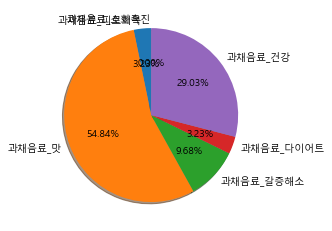

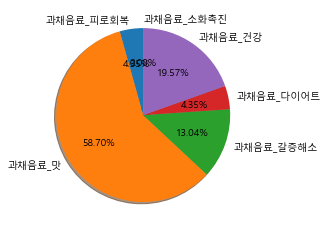

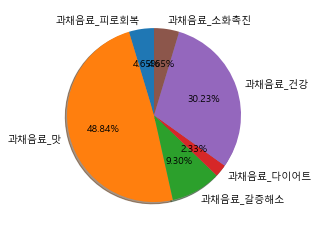

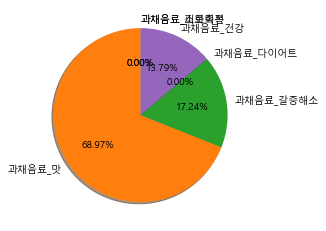

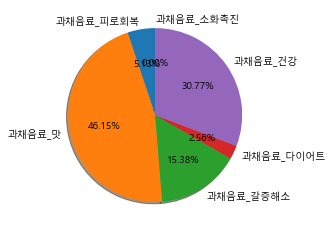

---------------------------------------------


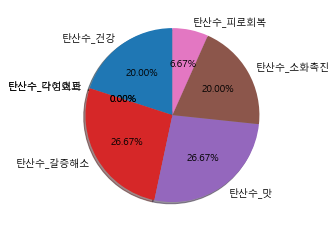

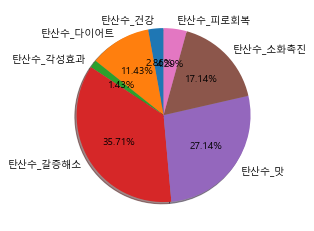

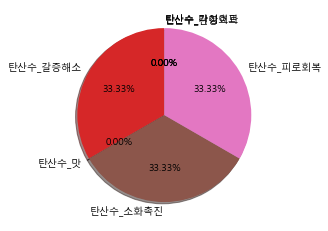

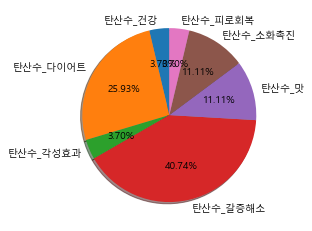

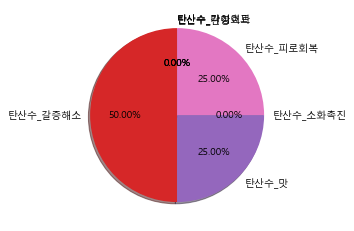

---------------------------------------------


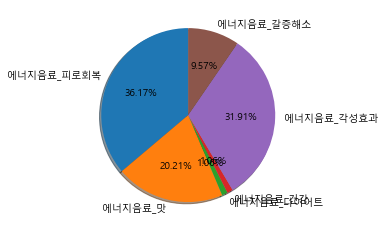

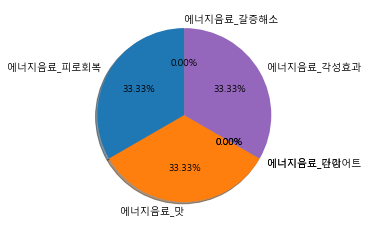

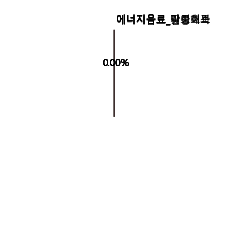

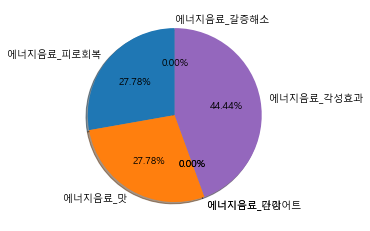

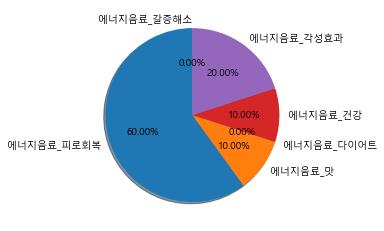

---------------------------------------------


In [93]:
for i in 기대요인:
    co = new_data[i]
    co['category'] = new_data.category
    sum_data = co.groupby('category')[i].sum()
    
    for i in range(5):
        aa = (sum_data.loc[i,:]/sum_data.sum(axis = 1)[i]*100).fillna(0)
        plt.pie(aa.values, labels=aa.index, shadow=True, startangle=90,autopct='%.2f%%')
        plt.title(f'{i} 군집')
        plt.show()
    print('---------------------------------------------')

# 우려요인

In [95]:
우려요인 = [['커피_합성 첨가물',
 '커피_당분',
 '커피_칼로리',
 '커피_치아 변색',
 '커피_치아 부식',
 '커피_없음',
 '커피_카페인'],
 ['탄산음료_당분',
 '탄산음료_칼로리',
 '탄산음료_합성 첨가물',
 '탄산음료_카페인',
 '탄산음료_없음',
 '탄산음료_치아 변색',
 '탄산음료_치아 부식'],
[ '이온/스포츠음료_치아 변색',
 '이온/스포츠음료_당분',
 '이온/스포츠음료_합성 첨가물',
 '이온/스포츠음료_칼로리',
 '이온/스포츠음료_치아 부식',
 '이온/스포츠음료_카페인',
 '이온/스포츠음료_없음'],
[ '과채음료_칼로리',
 '과채음료_합성 첨가물',
 '과채음료_당분',
 '과채음료_없음',
 '과채음료_카페인',
 '과채음료_치아 부식',
 '과채음료_치아 변색'],
[ '탄산수_합성 첨가물',
 '탄산수_칼로리',
 '탄산수_치아 부식',
 '탄산수_당분',
 '탄산수_없음',
 '탄산수_치아 변색',
 '탄산수_카페인'],
[ '에너지음료_카페인',
 '에너지음료_당분',
 '에너지음료_없음',
 '에너지음료_치아 변색',
 '에너지음료_합성 첨가물',
 '에너지음료_치아 부식',
 '에너지음료_칼로리']]

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


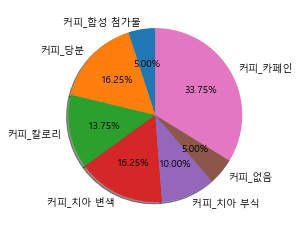

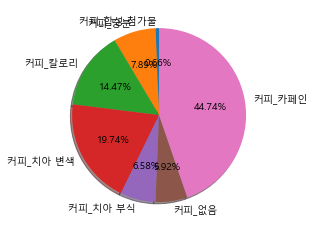

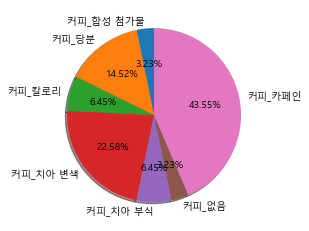

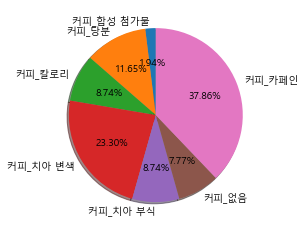

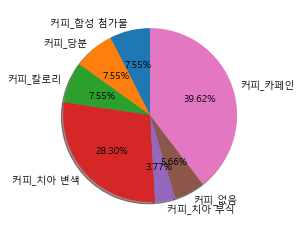

---------------------------------------------


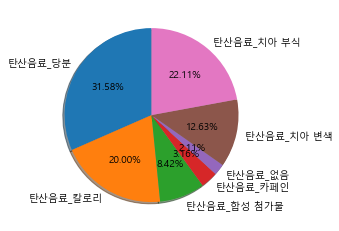

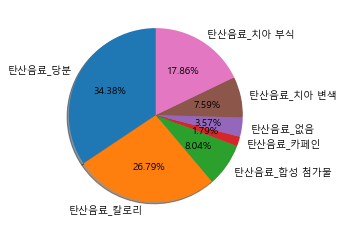

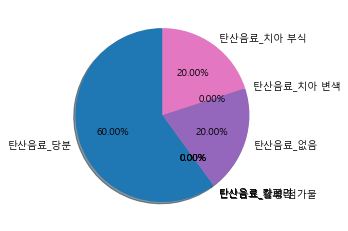

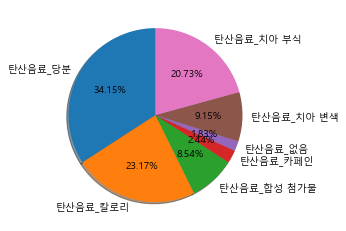

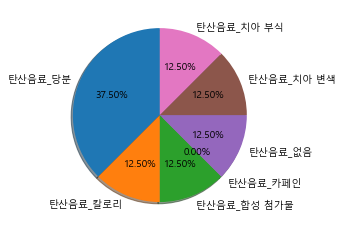

---------------------------------------------


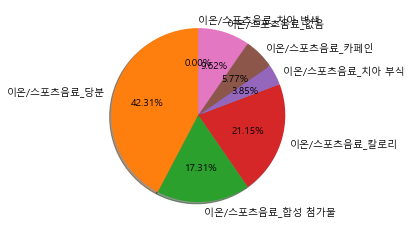

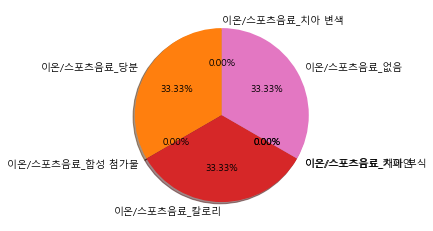

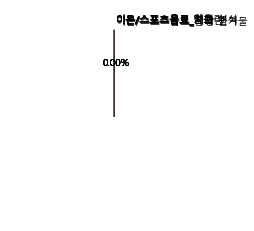

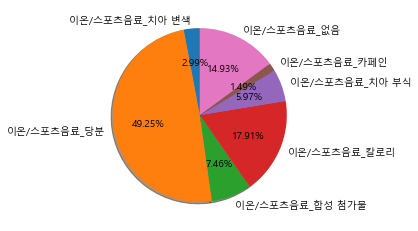

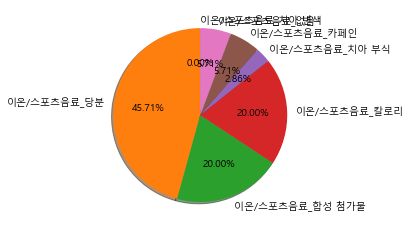

---------------------------------------------


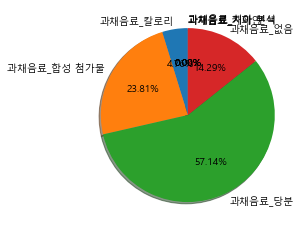

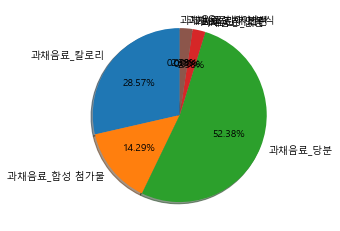

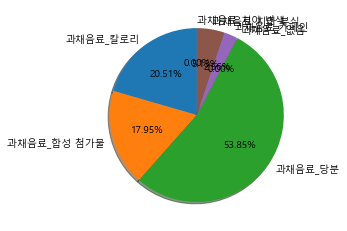

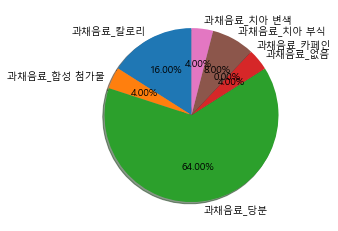

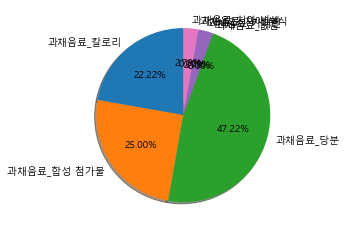

---------------------------------------------


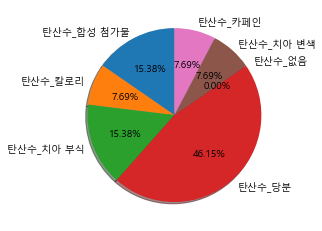

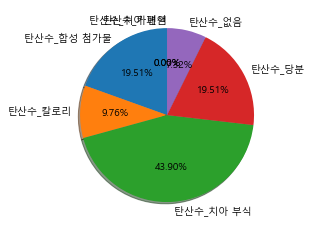

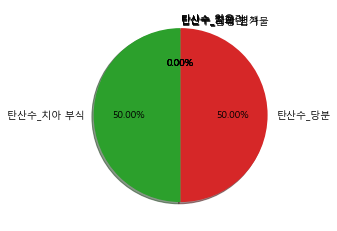

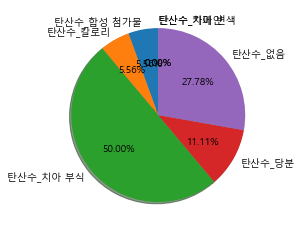

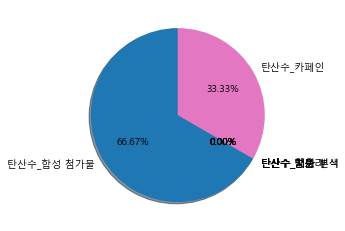

---------------------------------------------


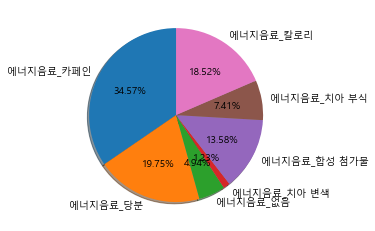

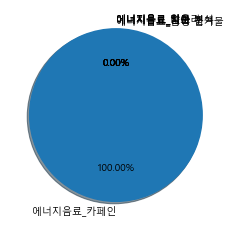

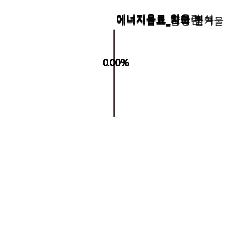

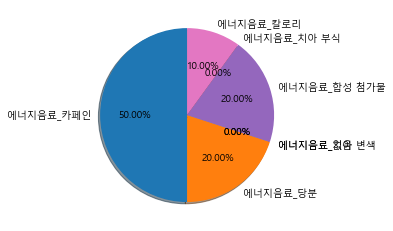

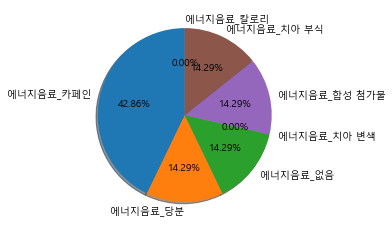

---------------------------------------------


In [96]:
for i in 우려요인:
    co = new_data[i]
    co['category'] = new_data.category
    sum_data = co.groupby('category')[i].sum()
    
    for i in range(5):
        aa = (sum_data.loc[i,:]/sum_data.sum(axis = 1)[i]*100).fillna(0)
        plt.pie(aa.values, labels=aa.index, shadow=True, startangle=90,autopct='%.2f%%')
        plt.title(f'{i} 군집')
        plt.show()
    print('---------------------------------------------')

# 무엇과 마시나

In [97]:
음식 = [['커피_디저트',
 '커피_음료만 섭취',
 '커피_샐러드/다이어트식',
 '커피_식사류'],
 ['탄산음료_샐러드/다이어트식',
 '탄산음료_디저트',
 '탄산음료_음료만 섭취',
 '탄산음료_식사류'],
 ['이온/스포츠음료_식사류',
 '이온/스포츠음료_음료만 섭취',
 '이온/스포츠음료_샐러드/다이어트식'],
 ['과채음료_샐러드/다이어트식',
 '과채음료_식사류',
 '과채음료_음료만 섭취',
 '과채음료_디저트',
 '탄산수_디저트'],
 ['탄산수_샐러드/다이어트식',
 '탄산수_음료만 섭취',
 '탄산수_식사류'],
[ '에너지음료_식사류',
 '에너지음료_음료만 섭취']]

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


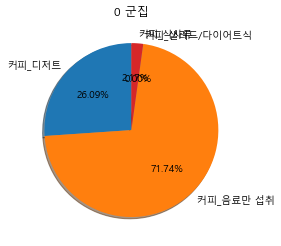

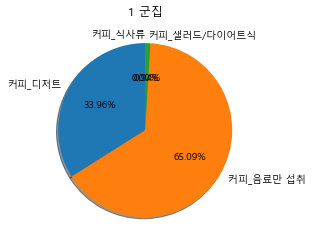

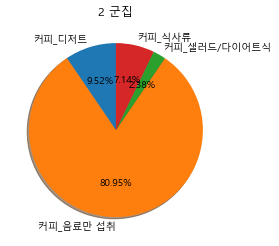

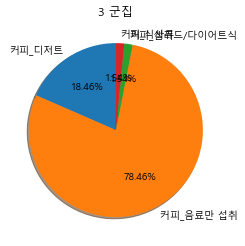

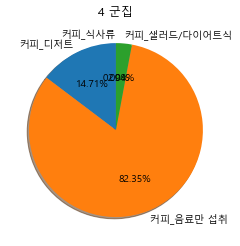

---------------------------------------------


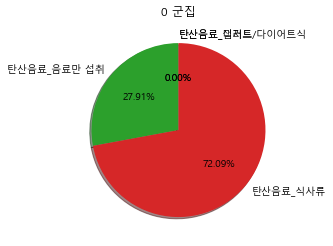

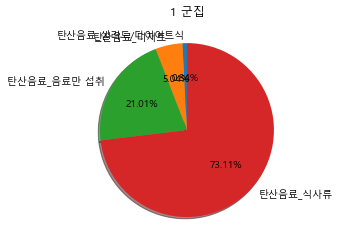

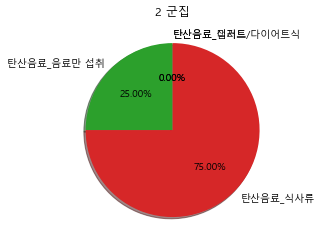

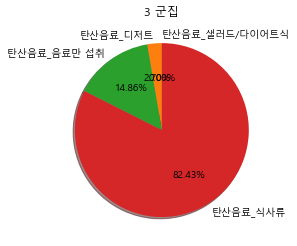

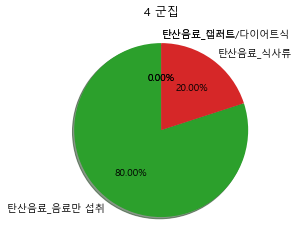

---------------------------------------------


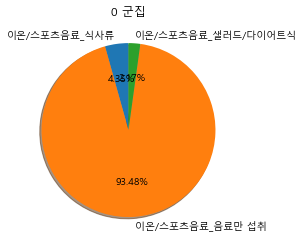

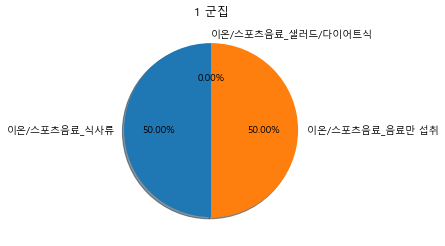

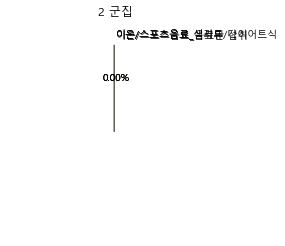

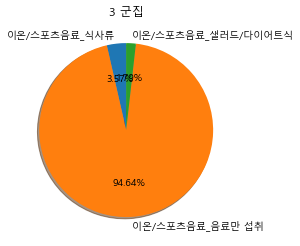

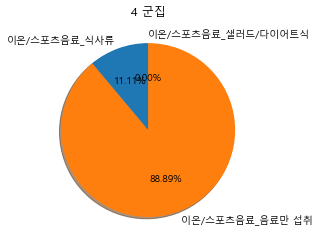

---------------------------------------------


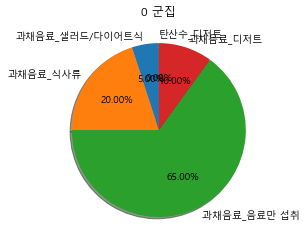

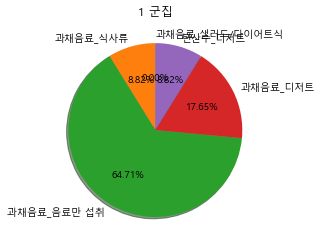

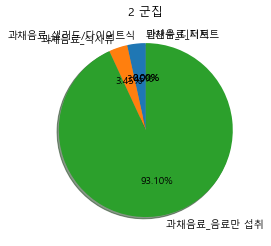

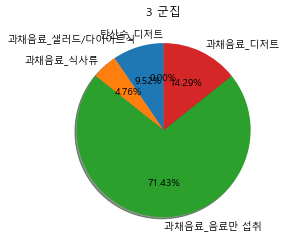

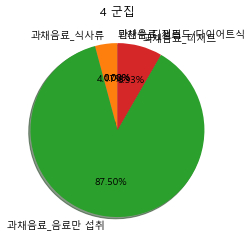

---------------------------------------------


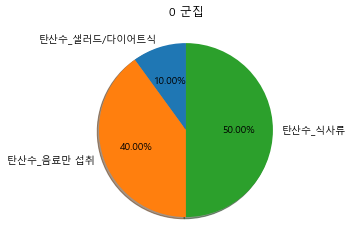

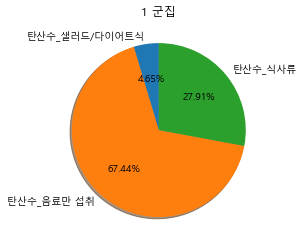

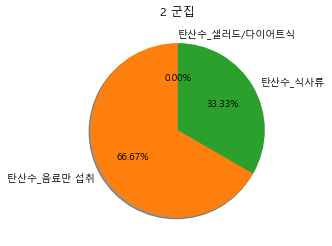

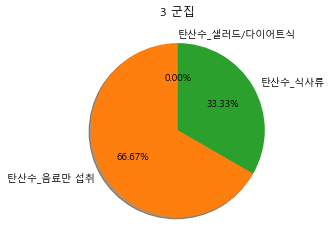

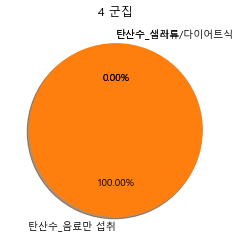

---------------------------------------------


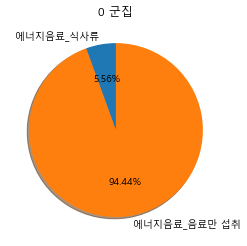

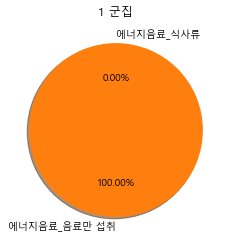

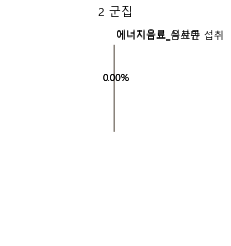

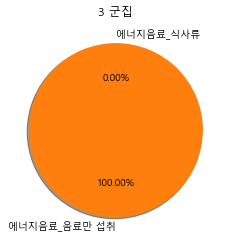

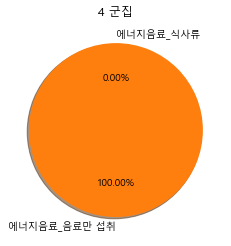

---------------------------------------------


In [99]:
for i in 음식:
    co = new_data[i]
    co['category'] = new_data.category
    sum_data = co.groupby('category')[i].sum()
    
    for i in range(5):
        aa = (sum_data.loc[i,:]/sum_data.sum(axis = 1)[i]*100).fillna(0)
        plt.pie(aa.values, labels=aa.index, shadow=True, startangle=90,autopct='%.2f%%')
        plt.title(f'{i} 군집')
        plt.show()
    print('---------------------------------------------')